<a href="https://colab.research.google.com/github/Deyonrose/labexercises/blob/main/2348513_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.preprocessing import OneHotEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [32]:
data=pd.read_csv('/content/Market_Basket_Optimisation.csv', header=None);

In [4]:
data.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(7500, 20)

In [5]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.describe

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.describe of               shrimp            almonds      avocado    vegetables mix  \
0            burgers          meatballs         eggs               NaN   
1            chutney                NaN          NaN               NaN   
2             turkey            avocado          NaN               NaN   
3      mineral water               milk   energy bar  whole wheat rice   
4     low fat yogurt                NaN          NaN               NaN   
...              ...                ...          ...               ...   
7495          butter         light mayo  fresh bread               NaN   
7496         burgers  frozen vegetables         eggs      french fries   
7497         chicken                NaN          NaN               NaN   
7498        escalope          green tea          NaN               NaN   
7499            eggs    frozen smoothie  yogurt cake    low fat yogurt   

     green grapes whole weat flour yams cottage cheese energy drink  \
0     

In [27]:
print(data.isnull().sum())

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
transactions = []
for row in data.iterrows():
    transaction = [item for item in row[1] if pd.notna(item)]
    transactions.append(transaction)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
transactions = []
for i in range(data.shape[0]):
    transaction = []
    for j in range(data.shape[1]):
        if pd.notna(data.iloc[i, j]):
            transaction.append(data.iloc[i, j])
    transactions.append(transaction)
    print(transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Streaming output truncated to the last 5000 lines.
['cake']
['cereals']
['escalope', 'pasta', 'mushroom cream sauce']
['olive oil', 'light mayo']
['cottage cheese']
['herb & pepper', 'ground beef', 'champagne', 'green tea']
['hot dogs']
['spaghetti', 'french fries', 'energy drink']
['ham', 'shrimp', 'ground beef', 'mineral water', 'avocado', 'milk', 'brownies', 'protein bar']
['mineral water', 'almonds', 'cottage cheese', 'light mayo']
['protein bar']
['red wine', 'candy bars']
['mineral water', 'avocado', 'milk', 'almonds', 'eggs', 'french fries', 'melons']
['herb & pepper']
['vegetables mix', 'escalope']
['tomatoes', 'milk']
['milk', 'salmon']
['eggs']
['mineral water', 'vegetables mix', 'rice', 'light mayo']
['vegetables mix']
['muffins', 'cookies', 'green tea']
['grated cheese', 'spinach', 'eggs', 'cooking oil', 'green tea', 'salad']
['strawberries']
['mineral water', 'cake', 'chicken', 'french fries', 'tomato juice']
['mineral water', 'cereals']
['chocolate', 'french fries']
['bur

In [19]:
all_items = sorted(set(item for transaction in transactions for item in transaction))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
all_items = set(item for transaction in transactions for item in transaction)
binary_data = {}
for idx, transaction in enumerate(transactions):
    for item in all_items:
        if item in transaction:
            if item not in binary_data:
                binary_data[item] = [0] * len(transactions)
            binary_data[item][idx] = 1
binary_df = pd.DataFrame(binary_data)
print(binary_df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      honey  low fat yogurt  shrimp  olive oil  whole weat flour  \
0         1               1       1          1                 1   
1         0               0       0          0                 0   
2         0               0       0          0                 0   
3         0               0       0          0                 0   
4         0               0       0          0                 0   
...     ...             ...     ...        ...               ...   
7496      0               0       0          0                 0   
7497      0               0       0          0                 0   
7498      0               0       0          0                 0   
7499      0               0       0          0                 0   
7500      0               1       0          0                 0   

      energy drink  tomato juice  salad  green tea  green grapes  ...  melons  \
0                1             1      1          1             1  ...       0   
1                0   

In [30]:
binary_df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


honey               0
low fat yogurt      0
shrimp              0
olive oil           0
whole weat flour    0
                   ..
burger sauce        0
oatmeal             0
 asparagus          0
cream               0
napkins             0
Length: 120, dtype: int64

In [33]:
item_counts = data.stack().value_counts()
print("Top 10 most frequent items:")
print(item_counts.head(10))


Top 10 most frequent items:
mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1230
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: int64


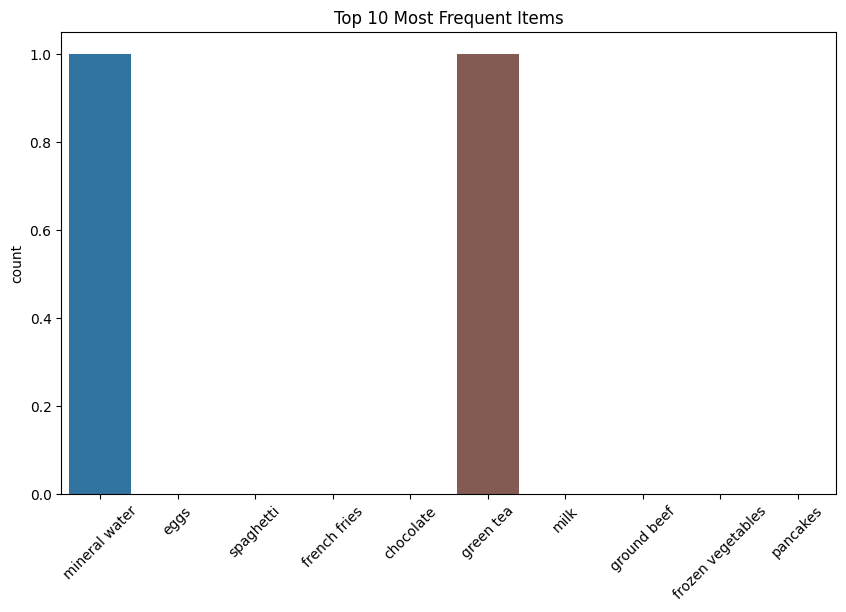

In [39]:
item_counts = data_filtered.stack().value_counts()

# Get the top 10 most frequent items
top_items = item_counts.index[:10]

# Filter the data to include only the top items
data_filtered = data.apply(lambda row: row[row.isin(top_items)], axis=1)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=data_filtered.stack(), x=0, order=top_items)
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Items")
plt.show()

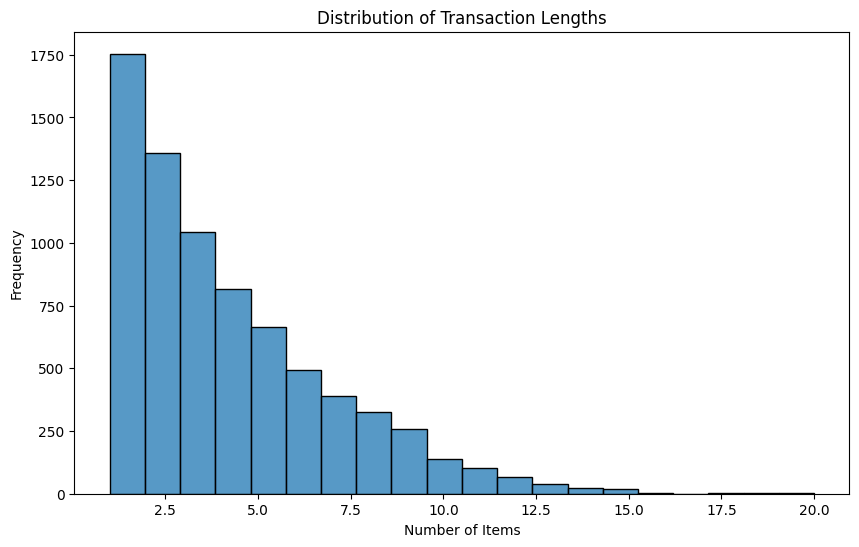

In [40]:
transaction_lengths = data.apply(lambda row: row.count(), axis=1)
plt.figure(figsize=(10, 6))
sns.histplot(transaction_lengths, bins=20)
plt.title("Distribution of Transaction Lengths")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.show()

In [44]:

frequent_itemsets = apriori(binary_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(rules.head())


       antecedents       consequents  antecedent support  consequent support  \
0          (honey)   (mineral water)            0.047460            0.238368   
1  (mineral water)           (honey)            0.238368            0.047460   
2          (honey)       (spaghetti)            0.047460            0.174110   
3      (spaghetti)           (honey)            0.174110            0.047460   
4  (mineral water)  (low fat yogurt)            0.238368            0.076523   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.015065    0.317416  1.331619  0.003752    1.115806       0.261443  
1  0.015065    0.063199  1.331619  0.003752    1.016801       0.326975  
2  0.011865    0.250000  1.435873  0.003602    1.101187       0.318684  
3  0.011865    0.068147  1.435873  0.003602    1.022200       0.367554  
4  0.023997    0.100671  1.315565  0.005756    1.026851       0.314943  


In [52]:
pivot_table = rules.pivot_table(index='antecedents', columns='consequents', values='lift')


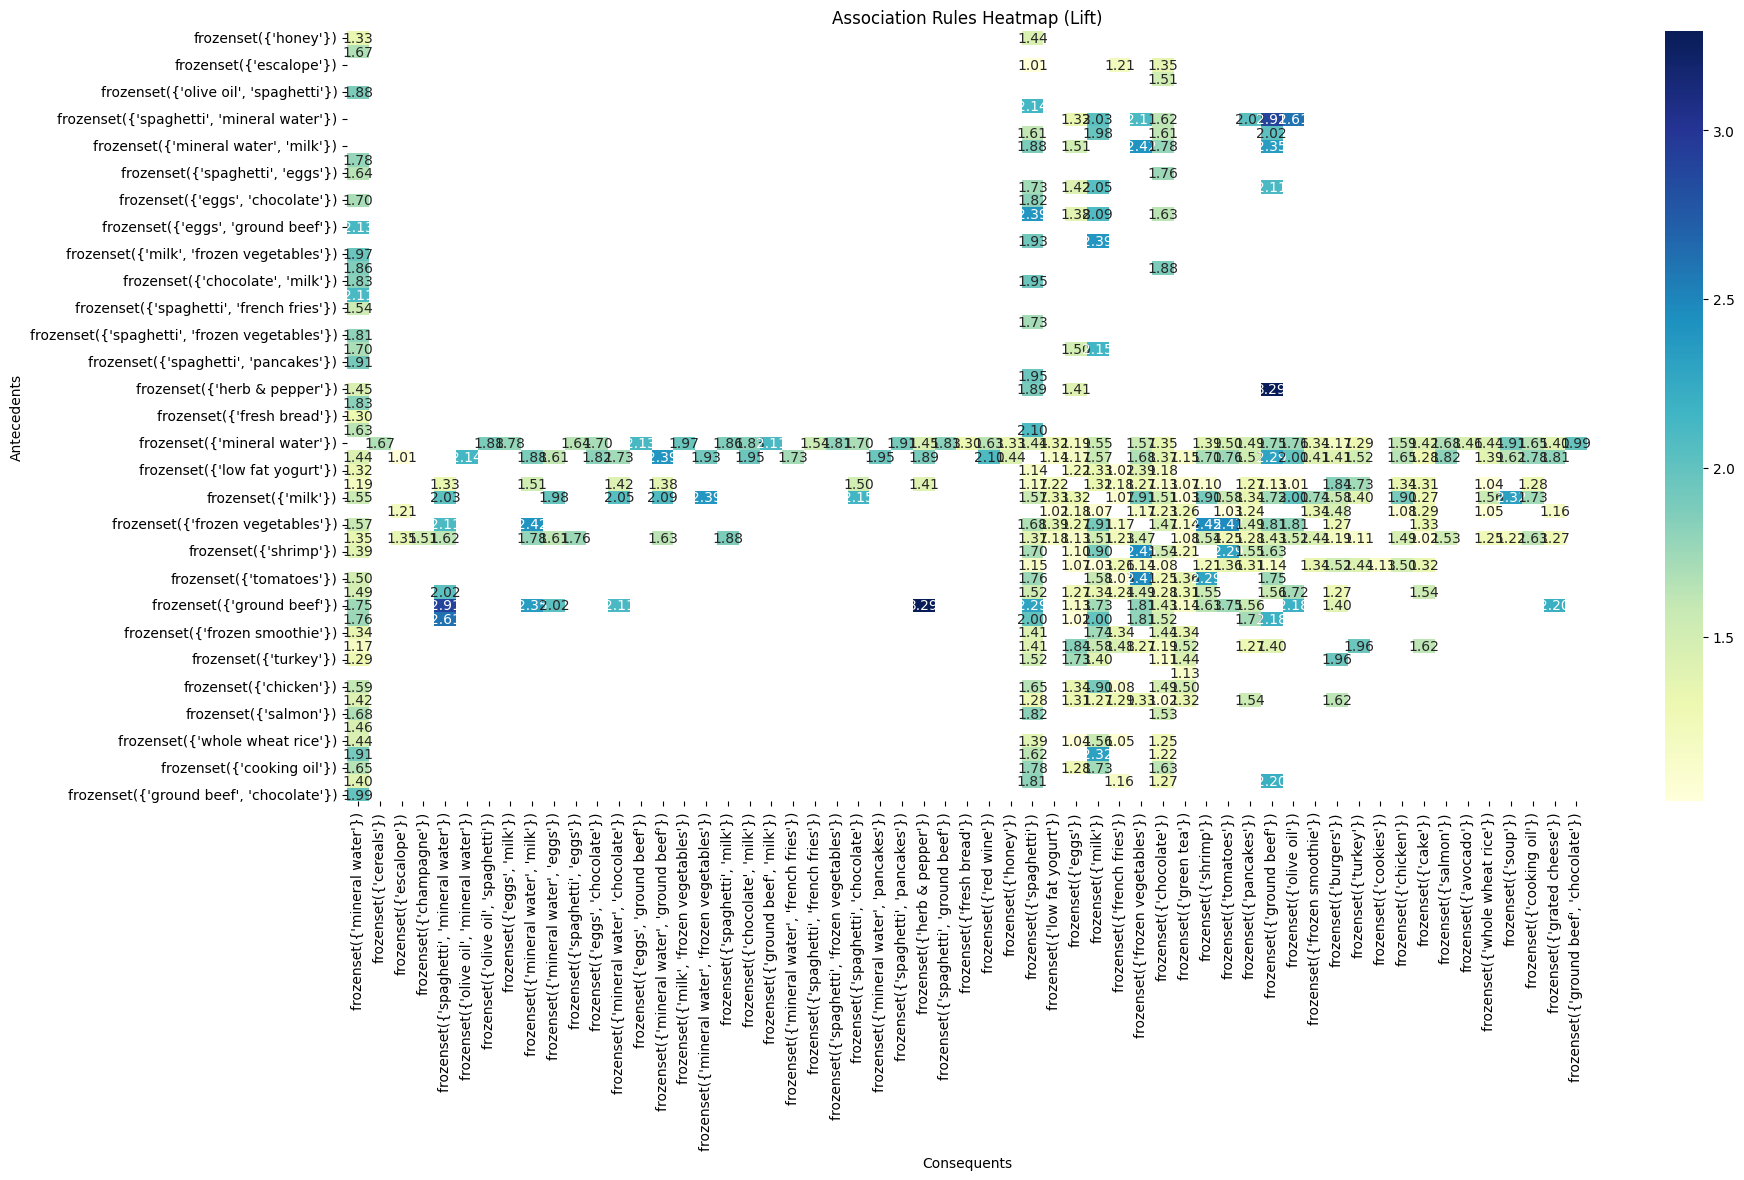

In [60]:
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Association Rules Heatmap (Lift)")
plt.xlabel("Consequents")
plt.ylabel("Antecedents")
plt.show()

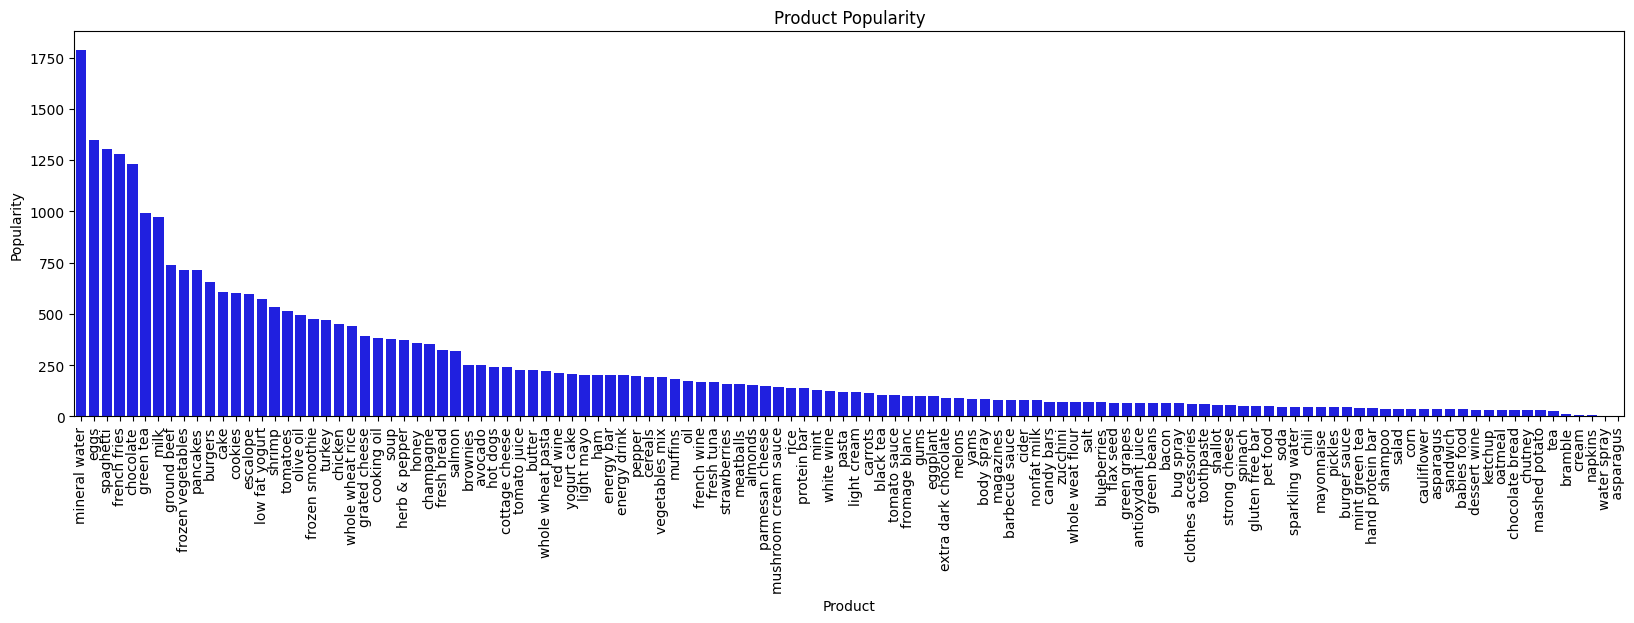

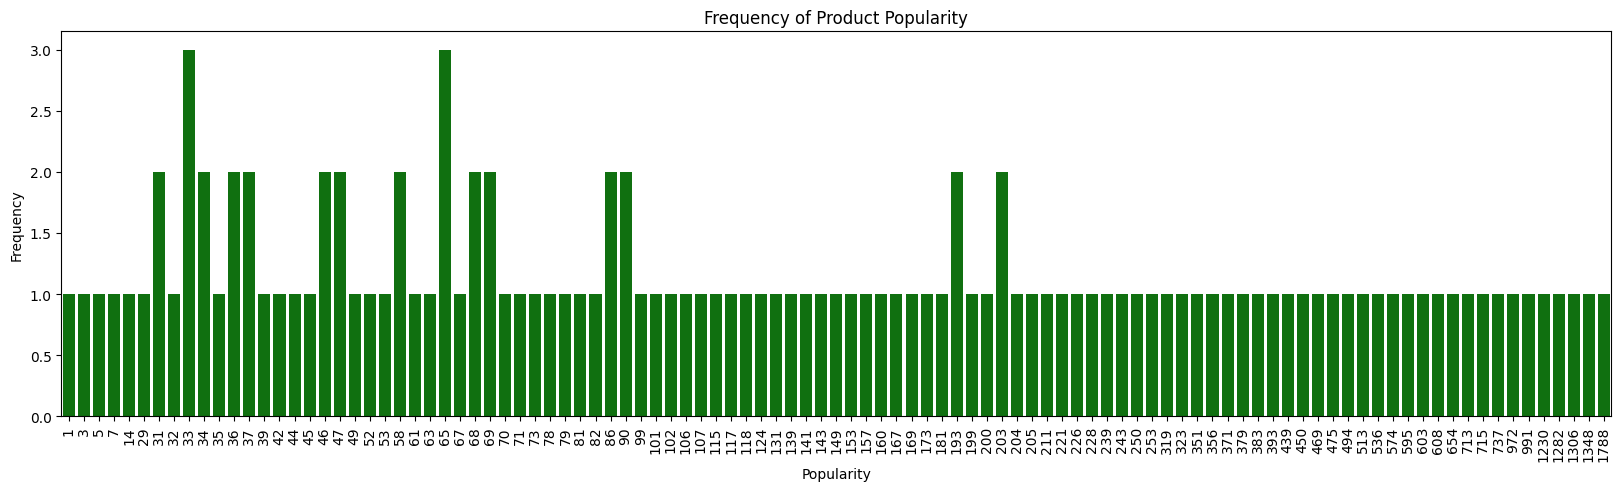

In [58]:



# Flatten the transaction data
transactions = data.apply(lambda row: [item for item in row if pd.notna(item)], axis=1)

# Calculate product popularity
product_popularity = pd.Series([item for sublist in transactions for item in sublist]).value_counts()

# Calculate frequency of product popularity
product_popularity_freq = product_popularity.value_counts().sort_index()

# Plot Product Popularity as a Bar Chart
plt.figure(figsize=(20, 5))
sns.barplot(x=product_popularity.index, y=product_popularity.values, color='blue')
plt.title("Product Popularity")
plt.xlabel("Product")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
plt.show()

# Plot Frequency of Product Popularity as a Bar Chart
plt.figure(figsize=(20, 5))
sns.barplot(x=product_popularity_freq.index, y=product_popularity_freq.values, color='green')
plt.title("Frequency of Product Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()
